1.	CRIM       per capita crime rate by town
2.	ZN         proportion of residential land zoned for lots over 25,000 sq.ft.
3.	INDUS      proportion of non-retail business acres per town.
4.	CHAS       Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5.	NOX        nitric oxides concentration (parts per 10 million)
6.	RM         average number of rooms per dwelling
7.	AGE        proportion of owner-occupied units built prior to 1940
8.	DIS        weighted distances to five Boston employment centres
9.	RAD        index of accessibility to radial highways
10.	TAX        full-value property-tax rate per dollars 10,000
11.	PTRATIO    pupil-teacher ratio by town
12.	B          1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13.	LSTAT      % lower status of the population
14.	MEDV       Median value of owner-occupied homes in $1000's


In [13]:
# Funciones para análisis de la regresión.
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

def plot_scatter_variables(df, target, variables=None):
    if variables is None:
        variables = [col for col in df.columns if col != target]

    num_vars = len(variables)
    cols = 3  # Número de columnas en la cuadrícula de subplots
    rows = (num_vars // cols) + (num_vars % cols > 0)  # Ajustar número de filas
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = axes.flatten()  # Convertimos en un array 1D para indexar fácilmente

    for i, var in enumerate(variables):
        sns.scatterplot(x=df[var], y=df[target], ax=axes[i], alpha=0.6)
        axes[i].set_xlabel(var)
        axes[i].set_ylabel(target)
        axes[i].set_title(f'{var} vs {target}')
    
    # Ocultar ejes vacíos si sobran
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
    
def plot_correlation_heatmap(df, method = None):
    if method is None:
        # Calculamos la matriz de correlación entre las variables numéricas
        corr_matrix = df.corr()
    else:
        corr_matrix = df.corr(method = method)
    # Dibujamos el heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5, cbar=True)
    plt.title('Correlación entre las Variables')
    plt.show()
    
def print_regression_report(y_true, y_pred):
    #evaluate our model's performance using mean squared error
    mse=mean_squared_error(y_true, y_pred)
    
    #evaluate our model's performance using mean absolute error
    mae=mean_absolute_error(y_true, y_pred)
    
    #evaluate our model's performance using r2_score
    R2_score=r2_score(y_true, y_pred)
    
    print("Mean Squared Error :",mse)
    print("mean Absolute Error :",mae)
    print("R2 Score :",R2_score)


In [2]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Usar el delimitador adecuado con 'sep'
housing_df = pd.read_csv('housing.csv', names=column_names, sep='\s+')

In [3]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


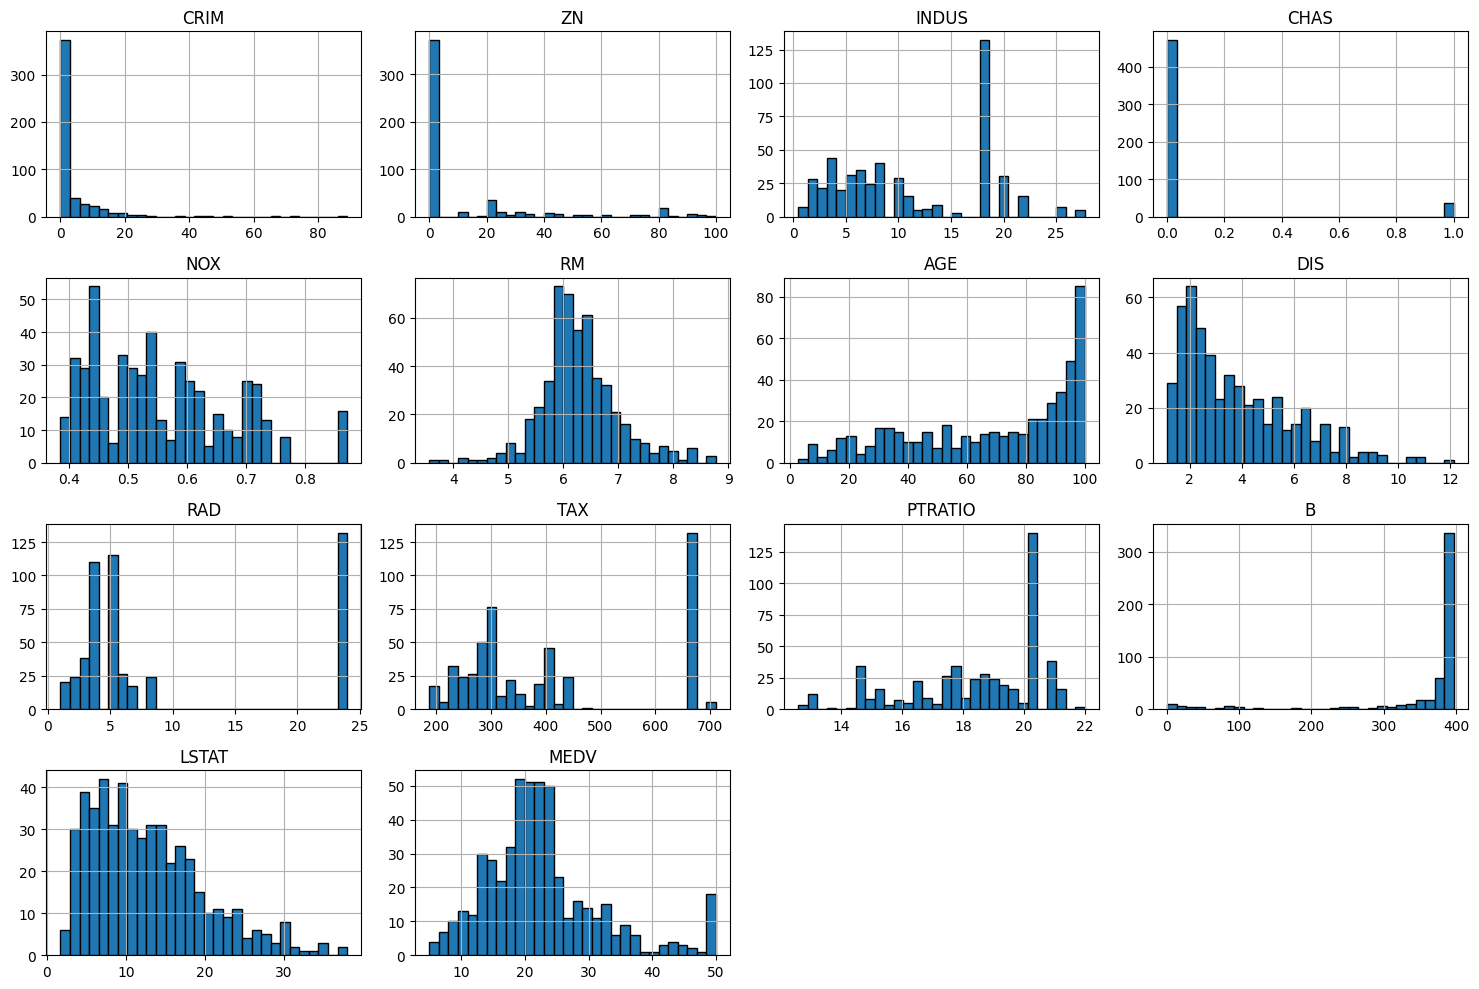

In [6]:
# Configuración del tamaño de las gráficas
housing_df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

1. CRIM (Tasa de criminalidad per cápita)
- Distribución: Altamente sesgada a la derecha.
- Interpretación: La mayoría de las zonas tienen tasas de criminalidad muy bajas, pero hay algunas con tasas significativamente más altas (outliers).
- Acción: Considera aplicar una transformación logarítmica para reducir el sesgo.

2. ZN (Proporción de terrenos residenciales para lotes grandes)
- Distribución: Sesgo a la derecha con muchos valores en 0.
- Interpretación: Muchas zonas no tienen terrenos residenciales grandes, y unas pocas tienen proporciones altas.
- Acción: Este tipo de variable puede comportarse como categórica o binaria en algunos modelos.

3. INDUS (Proporción de terrenos no comerciales)
- Distribución: Bimodal, con picos alrededor de 6 y 18.
- Interpretación: Algunas áreas tienen baja industrialización mientras que otras son altamente industriales.
- Acción: Revisa la correlación con MEDV, ya que zonas más industriales podrían tener valores de viviendas más bajos.

4. CHAS (Variable dummy del Río Charles)
- Distribución: Altamente desequilibrada, la mayoría es 0 (no colinda con el río).
- Interpretación: Muy pocas propiedades están cerca del río.
- Acción: Puede tener un impacto significativo en el precio de las viviendas debido a su naturaleza binaria.

5. NOX (Concentración de óxidos nítricos)
- Distribución: Sesgada hacia la izquierda, pero relativamente dispersa.
- Interpretación: La mayoría de las áreas tienen concentraciones bajas, aunque hay valores altos que podrían afectar negativamente el valor de las viviendas.
- Acción: Considera la relación con INDUS y CRIM.

6. RM (Número promedio de habitaciones por vivienda)
- Distribución: Aproximadamente normal.
- Interpretación: La mayoría de las viviendas tienen entre 5 y 7 habitaciones. Esto es una buena señal para la regresión lineal.
- Acción: Altamente correlacionada con MEDV, generalmente más habitaciones = mayor precio.

7. AGE (Proporción de viviendas construidas antes de 1940)
- Distribución: Sesgada a la izquierda.
- Interpretación: Muchas viviendas son antiguas (más del 80%).
- Acción: Podría relacionarse negativamente con MEDV, dependiendo del estado de las viviendas.

8. DIS (Distancia a los centros de empleo)
- Distribución: Sesgada a la derecha.
- Interpretación: La mayoría de las viviendas están cerca de los centros de empleo, pero algunas están mucho más alejadas.
- Acción: Puede tener una relación inversa con MEDV, donde viviendas más cercanas a centros urbanos son más costosas.

9. RAD (Accesibilidad a autopistas radiales)
- Distribución: Discreta y altamente sesgada.
- Interpretación: Algunos valores específicos son muy comunes, lo que indica que ciertos niveles de accesibilidad son más frecuentes.
- Acción: Variable categórica en esencia, podría transformarse para modelos.

10. TAX (Tasa de impuesto a la propiedad)
- Distribución: Multimodal, con un pico significativo alrededor de 660.
- Interpretación: Las tasas de impuestos varían bastante entre las zonas.
- Acción: Revisar la correlación con RAD y INDUS.

11. PTRATIO (Proporción alumno-profesor por zona)
- Distribución: Discreta con acumulación en ciertos valores.
- Interpretación: Muchas zonas comparten las mismas proporciones de alumnos por maestro.
- Acción: Podría tener una relación inversa con MEDV, donde menores ratios indican mejores escuelas y valores de vivienda más altos.

12. B (Proporción de personas de raza negra por zona, transformada)
- Distribución: Altamente sesgada hacia la derecha.
- Interpretación: La mayoría de los valores están cerca del máximo (400), lo que podría indicar poca variación en esta variable.
- Acción: Podría tener una relación complicada con MEDV, revisar correlación.

13. LSTAT (% de población de bajo estatus socioeconómico)
- Distribución: Sesgada a la derecha.
- Interpretación: La mayoría de las zonas tienen un porcentaje bajo de población de estatus socioeconómico bajo, pero algunas zonas presentan valores significativamente más altos.
- Acción: Probablemente tenga una fuerte correlación negativa con MEDV.

14. MEDV (Valor mediano de las viviendas)
- Distribución: Aproximadamente normal, pero con un pico en 50 (posible tope en el dataset).
- Interpretación: El tope sugiere que podría haber un límite en los datos recogidos, lo cual puede afectar la precisión del modelo para valores altos.
- Acción: Considerar que los valores en 50 podrían estar censurados, lo cual puede distorsionar el modelo.


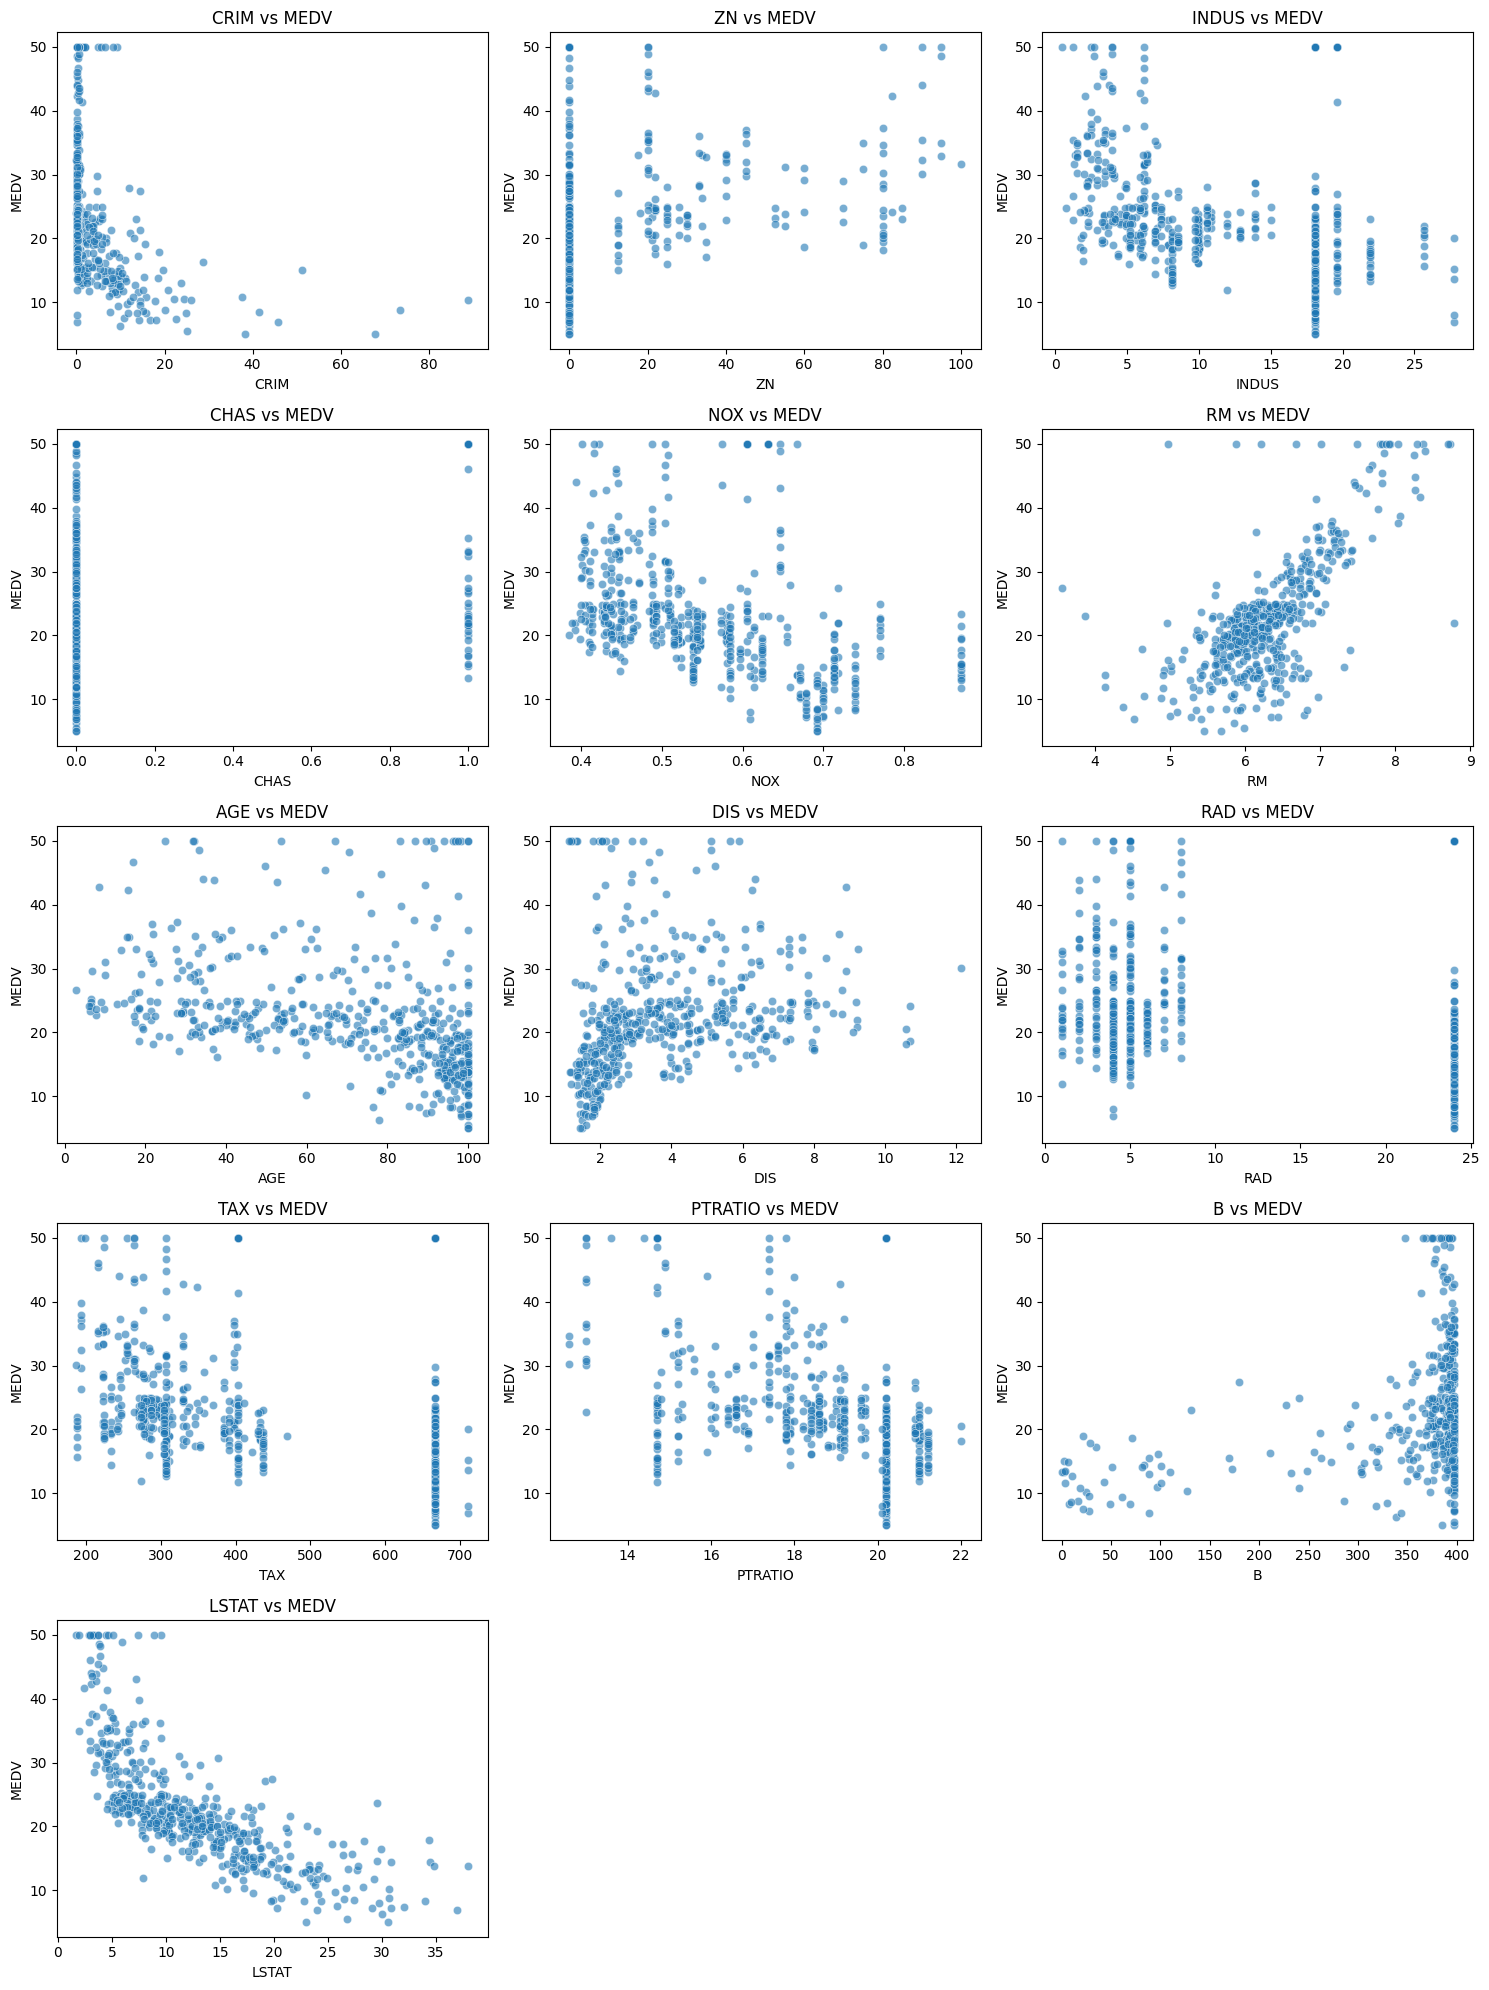

In [9]:
plot_scatter_variables(housing_df, target='MEDV')


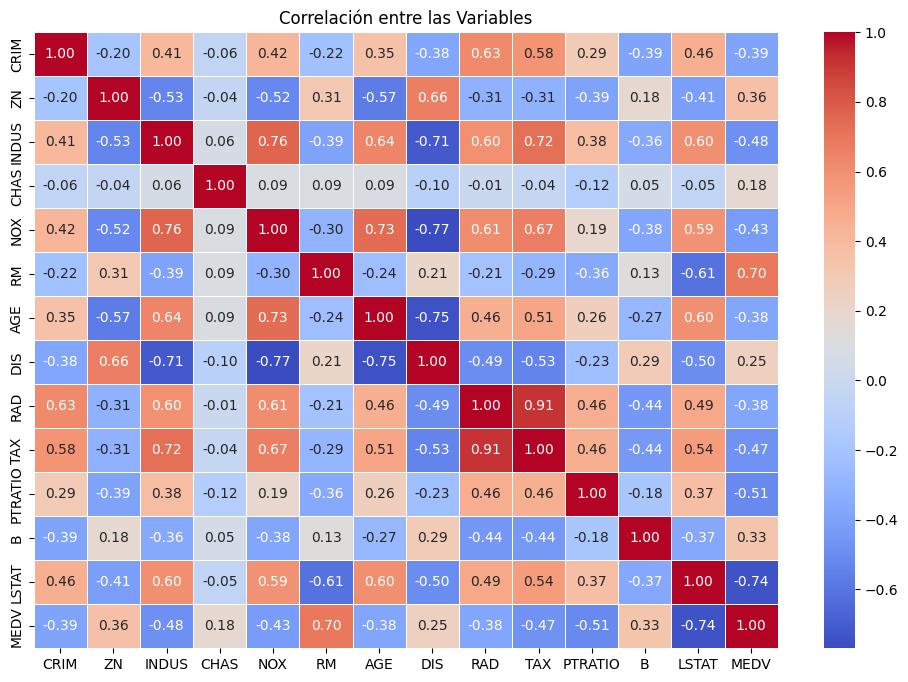

In [10]:
plot_correlation_heatmap(housing_df)


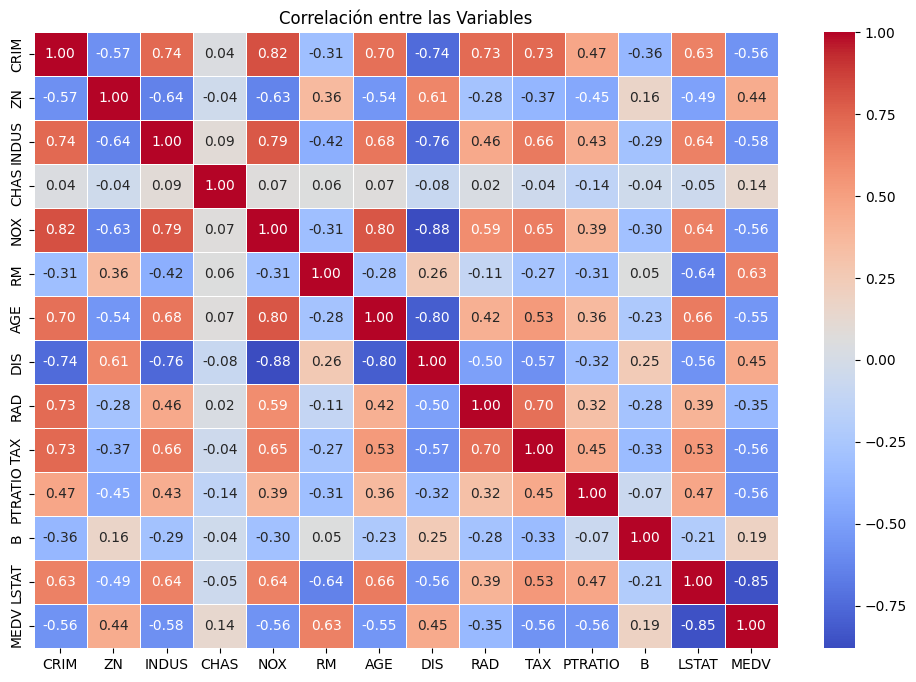

In [11]:
plot_correlation_heatmap(housing_df, method='spearman')


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Definir features y target
X = housing_df.drop('MEDV', axis=1)
y = housing_df['MEDV']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir valores
y_pred = model.predict(X_test)

# Evaluar el modelo usando la función personalizada
print_regression_report(y_test, y_pred)


Mean Squared Error : 24.2911194749737
mean Absolute Error : 3.189091965887872
R2 Score : 0.6687594935356296


- El MSE mide el promedio de los errores al cuadrado entre los valores predichos y los valores reales. Como los errores están al cuadrado, penaliza más fuertemente los errores grandes.
    - Dado que la variable objetivo (MEDV) representa el precio de las casas en miles de dólares, un MSE de 24.29 significa que el error cuadrático medio es de aproximadamente $24,290.
- El MAE es el promedio de los errores absolutos entre las predicciones y los valores reales. Es más intuitivo que el MSE porque no penaliza los errores grandes tan severamente.
    - Un MAE de 3.19 significa que, en promedio, tus predicciones están desviadas en $3,190 del valor real de las viviendas.


- La diferencia entre el MAE y el MSE sugiere que hay algunos errores grandes en las predicciones que están influyendo más en el MSE.


- El R² (Coeficiente de Determinación) mide qué tan bien el modelo explica la variabilidad de la variable objetivo.
    - Un R² de 0.669 indica que tu modelo está explicando alrededor del 66.9% de la variabilidad en los precios de las viviendas.


In [14]:
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Definir las features y el target
X = housing_df.drop('MEDV', axis=1)
y = housing_df['MEDV']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Agregar la constante para el término independiente (intercepto)
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Crear y entrenar el modelo OLS
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Mostrar el resumen estadístico del modelo
print(ols_model.summary())

# Predecir valores en el conjunto de prueba
y_pred = ols_model.predict(X_test_sm)

# Usar la función para evaluar el modelo
print_regression_report(y_test, y_pred)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     90.43
Date:                Mon, 03 Feb 2025   Prob (F-statistic):          6.21e-109
Time:                        19:27:24   Log-Likelihood:                -1194.3
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     390   BIC:                             2473.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.2468      5.677      5.328      0.0